<a href="https://colab.research.google.com/github/elmahygurl/NLP_sst_Classification/blob/main/NLP_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting dataset

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset, Dataset


In [3]:
sst_dataset = load_dataset('sst')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for sst contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sst
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/8544 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1101 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [4]:
print(sst_dataset['train'][500])
print(f"Number of training examples: {len(sst_dataset['train'])}")
print(f"Number of validation examples: {len(sst_dataset['validation'])}")
print(f"Number of test examples: {len(sst_dataset['test'])}")

{'sentence': 'This story still seems timely and important .', 'label': 0.6944400072097778, 'tokens': 'This|story|still|seems|timely|and|important|.', 'tree': '14|14|13|11|9|9|10|12|10|11|12|13|15|15|0'}
Number of training examples: 8544
Number of validation examples: 1101
Number of test examples: 2210


# Preprocessing

Removing the 'tree' column and adjusting the labels to accomodate the 5 classes we want to classify to where:
From 0 to 0.2 (0.2 included) will be class 0 “very negative”.

From 0.2 to 0.4 (0.4 included) will be class 1 “negative”.

From 0.4 to 0.6 (0.6 included) will be class 2 “neutral”.

From 0.6 to 0.8 (0.8 included) will be class 3 “positive”.

From 0.8 to 1.0 (1.0 included) will be class 4 “very positive”.

In [5]:
#converting splits to Pandas DataFrame for manipulation
import pandas as pd
train_df = pd.DataFrame(sst_dataset['train'])
test_df = pd.DataFrame(sst_dataset['test'])
val_df = pd.DataFrame(sst_dataset['validation'])

#function to map float labels to our desired categorical classes
def map_labels_to_categories(label):
    if 0.0 <= label <= 0.2:
        return 0  # very negative
    elif 0.2 < label <= 0.4:
        return 1  # negative
    elif 0.4 < label <= 0.6:
        return 2  # neutral
    elif 0.6 < label <= 0.8:
        return 3  # positive
    elif 0.8 < label <= 1.0:
        return 4  # very positive

#mapping function to create a new column with mapped labels
train_df['mapped_label'] = train_df['label'].apply(map_labels_to_categories)
test_df['mapped_label'] = test_df['label'].apply(map_labels_to_categories)
val_df['mapped_label'] = val_df['label'].apply(map_labels_to_categories)

#dropping the original label column
train_df = train_df.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)
val_df = val_df.drop('label', axis=1)

train_df = train_df.drop(columns=['tree']) #dropping 'tree' column
test_df = test_df.drop(columns=['tree'])
val_df = val_df.drop(columns=['tree'])

######just to print an output and visualise
#convert the DataFrame back to the datasets format
sst_dataset['train'] = Dataset.from_pandas(train_df)
sst_dataset['test'] = Dataset.from_pandas(test_df)
sst_dataset['validation'] = Dataset.from_pandas(val_df)

#display the updated dataset
print(sst_dataset)

DatasetDict({
    train: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 2210
    })
})


In [6]:
#analyzing the distribution of labels
train_label_distribution = train_df['mapped_label'].value_counts().sort_index()
test_label_distribution = test_df['mapped_label'].value_counts().sort_index()
val_label_distribution = val_df['mapped_label'].value_counts().sort_index()

print("Training Split Label Distribution:")
print(train_label_distribution)

print("\nTest Split Label Distribution:")
print(test_label_distribution)

print("\nValidation Split Label Distribution:")
print(val_label_distribution)


Training Split Label Distribution:
0    1092
1    2218
2    1624
3    2322
4    1288
Name: mapped_label, dtype: int64

Test Split Label Distribution:
0    279
1    633
2    389
3    510
4    399
Name: mapped_label, dtype: int64

Validation Split Label Distribution:
0    139
1    289
2    229
3    279
4    165
Name: mapped_label, dtype: int64


### Visualisation for us

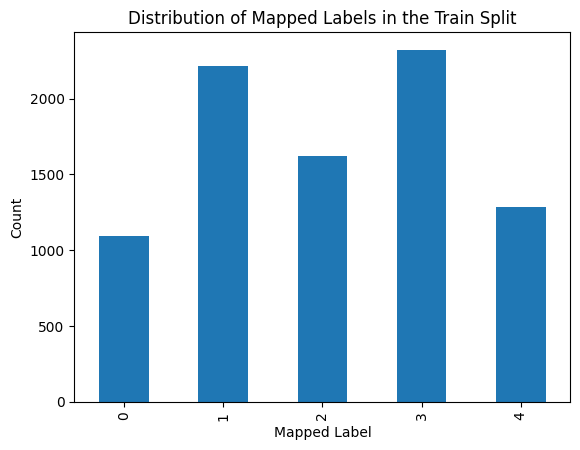

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
train_df = pd.DataFrame(sst_dataset['train']) #convert the 'train' split to a Pandas DataFrame

# Plot the distribution of mapped labels in the 'train' split
train_df['mapped_label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Mapped Labels in the Train Split')
plt.xlabel('Mapped Label')
plt.ylabel('Count')
plt.show()

In [ ]:
#print first few rows of the 'train' split to see the transformed data
print(train_df.head())

#to ensure correct mapping
print("Unique values in mapped_labels = ",train_df['mapped_label'].unique())

#check for missing values in the 'mapped_label' column of the 'train' split
print("Missing = ",train_df['mapped_label'].isnull().sum())


                                            sentence  \
0  The Rock is destined to be the 21st Century 's...   
1  The gorgeously elaborate continuation of `` Th...   
2  Singer\/composer Bryan Adams contributes a sle...   
3  You 'd think by now America would have had eno...   
4               Yet the act is still charming here .   

                                              tokens  mapped_label  
0  The|Rock|is|destined|to|be|the|21st|Century|'s...             3  
1  The|gorgeously|elaborate|continuation|of|``|Th...             4  
2  Singer\/composer|Bryan|Adams|contributes|a|sle...             3  
3  You|'d|think|by|now|America|would|have|had|eno...             2  
4               Yet|the|act|is|still|charming|here|.             3  
Unique values in mapped_labels =  [3 4 2 1 0]
Missing =  0


## Naive Bayes


In [ ]:
import numpy as np
def train_naive_bayes(D, C):
    Ndoc = len(D)   #total number of documents in training dataset D
    Nc = np.array([np.sum(D['mapped_label'] == c) for c in C]) #calculates no. of documents in D that belong to each class in C
    logprior = np.log(Nc / Ndoc) #calculating prior probability of each class

    #building vocabulary of D
    V = set()
    for doc in D['sentence']:
        V.update(doc.split())  #adding to V so it has unique words
    V = list(V) #converting to list

    #calculating P(w|c) terms
    bigdoc = {}  #new dictionary
    for c in C:
        bigdoc[c] = ' '.join(D[D['mapped_label'] == c]['sentence']).split() #concatenate sentences of documents belonging to each class and split them into words

    #calculating frequency of each word in vocabulary for each class and store counts in a 2D NumPy array count
    count = np.zeros((len(V), len(C)))
    for i, word in enumerate(V):
        for j, c in enumerate(C):
            count[i, j] = bigdoc[c].count(word)

    #calculate log likelihoods of each word given each class
    #using Laplace smoothing to avoid zero probabilities
    loglikelihood = np.log((count + 1) / (np.sum(count, axis=0, keepdims=True) + len(V)))

    return logprior, loglikelihood, V

def test_naive_bayes(testdoc, logprior, loglikelihood, C, V):
    sum_ = np.zeros(len(C))  # to store log probabilities of each class for the given testdoc
    for c in C:
        sum_[c] = logprior[c]
        for word in testdoc.split():
            if word in V:  #if present in vocab
                sum_[c] += loglikelihood[V.index(word), c]

    return np.argmax(sum_) #returns index of the class with the highest log probability (indicating predicted class for the testdoc)

#list with the classes we have (aka labels)
C = [0, 1, 2, 3, 4]

#Trainingg
logprior, loglikelihood, V = train_naive_bayes(train_df, C)

#Testingg
correct = 0
total = len(test_df)
for i in range(total):
    predicted_label = test_naive_bayes(test_df.iloc[i]['sentence'], logprior, loglikelihood, C, V)
    if predicted_label == test_df.iloc[i]['mapped_label']:
        correct += 1

accuracy = correct / total
print("Accuracy when splitting sentence:", accuracy)


Accuracy when splitting sentence: 0.39683257918552034


#####same thing but with existing tokens in dataset not spliting the sentence

In [ ]:
def train_naive_bayes1(D, C):
    #calculate P(c) terms
    Ndoc = len(D)
    Nc = np.array([np.sum(D['mapped_label'] == c) for c in C])
    logprior = np.log(Nc / Ndoc)

    # building vocab with existing tokens in dataset
    V = set()
    for tokens in D['tokens']:
        V.update(tokens)
    V = list(V)

    #calculate P(w|c) terms
    bigdoc = {}
    for c in C:
        bigdoc[c] = [token for tokens in D[D['mapped_label'] == c]['tokens'] for token in tokens]

    count = np.zeros((len(V), len(C)))
    for i, word in enumerate(V):
        for j, c in enumerate(C):
            count[i, j] = bigdoc[c].count(word)

    loglikelihood = np.log((count + 1) / (np.sum(count, axis=0, keepdims=True) + len(V)))

    return logprior, loglikelihood, V

def test_naive_bayes1(testdoc, logprior, loglikelihood, C, V):
    sum_ = np.zeros(len(C))
    for c in C:
        sum_[c] = logprior[c]
        for word in testdoc:
            if word in V:
                sum_[c] += loglikelihood[V.index(word), c]

    return np.argmax(sum_)

#classes
C = [0, 1, 2, 3, 4]

logprior, loglikelihood, V = train_naive_bayes1(train_df, C)

correct = 0
total = len(test_df)
for i in range(total):
    predicted_label = test_naive_bayes1(test_df.iloc[i]['tokens'], logprior, loglikelihood, C, V)
    if predicted_label == test_df.iloc[i]['mapped_label']:
        correct += 1

accuracy = correct / total
print("Accuracy with existing tokens in dataset:", accuracy)


Accuracy with existing tokens in dataset: 0.2864253393665158


####Metrics and comparison with sklearn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#create pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB(alpha=1.0))  # Alpha parameter for Laplace smoothing
    ])

#Train pipeline
pipeline.fit(train_df['sentence'], train_df['mapped_label'])


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
# Make predictions
predictions_sklearn = pipeline.predict(test_df['sentence'])

accuracy_sklearn = accuracy_score(test_df['mapped_label'], predictions_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)


Accuracy (scikit-learn): 0.4090497737556561


In [ ]:
#  function to make the Confusion Matrix
def confusion_matrix_numpy(y_true, y_pred, num_classes):
    confusion_mat = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_mat[true][pred] += 1
    return confusion_mat

conf_matrix_numpy = confusion_matrix_numpy(test_df['mapped_label'], predictions_sklearn, len(C))
print("Confusion Matrix (only using numpy):\n", conf_matrix_numpy)

# Precision, Recall, and F1 score per class
def precision_recall_f1_numpy(conf_matrix):
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1

precision_numpy, recall_numpy, f1_numpy = precision_recall_f1_numpy(conf_matrix_numpy)
print("Precision:", precision_numpy)
print("Recall:", recall_numpy)
print("F1 Score:", f1_numpy)

# Macro-averaged Precision, Recall, and F1 score
def macro_averaged_metrics_numpy(precision, recall, f1):
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1)
    return macro_precision, macro_recall, macro_f1

precision_macro_numpy, recall_macro_numpy, f1_macro_numpy = macro_averaged_metrics_numpy(precision_numpy, recall_numpy, f1_numpy)
print("Macro-averaged Precision:", precision_macro_numpy)
print("Macro-averaged Recall:", recall_macro_numpy)
print("Macro-averaged F1 Score:", f1_macro_numpy)


Confusion Matrix (only using numpy):
 [[ 28 200  10  41   0]
 [ 22 415  57 127  12]
 [  8 154  34 181  12]
 [  2  88  39 340  41]
 [  2  39  12 259  87]]
Precision: [0.4516129  0.46316964 0.22368421 0.35864979 0.57236842]
Recall: [0.10035842 0.65560821 0.0874036  0.66666667 0.21804511]
F1 Score: [0.16422287 0.54283846 0.12569316 0.46639232 0.31578947]
Macro-averaged Precision: 0.41389699333828645
Macro-averaged Recall: 0.3456164032418666
Macro-averaged F1 Score: 0.3229872566299008


##### better representation (for us)

In [ ]:
import pandas as pd

#create DataFrame for precision, recall, and F1 score
metrics_df = pd.DataFrame({
    'Precision': precision_numpy,
    'Recall': recall_numpy,
    'F1 Score': f1_numpy
}, index=C)  # Assuming C contains the class labels


# create DataFrame for macro-averaged precision, recall, and F1 score
macro_metrics_df = pd.DataFrame({
    'Precision': [precision_macro_numpy],
    'Recall': [recall_macro_numpy],
    'F1 Score': [f1_macro_numpy]
})

print("Metrics per class (scikit-learn):\n", metrics_df)
print("-------------------------------------")
print("Macro-averaged Metrics (scikit-learn):\n", macro_metrics_df)


Metrics per class (scikit-learn):
    Precision    Recall  F1 Score
0   0.451613  0.100358  0.164223
1   0.463170  0.655608  0.542838
2   0.223684  0.087404  0.125693
3   0.358650  0.666667  0.466392
4   0.572368  0.218045  0.315789
-------------------------------------
Macro-averaged Metrics (scikit-learn):
    Precision    Recall  F1 Score
0   0.413897  0.345616  0.322987


# Logistic regression

In [ ]:
import numpy as np

# Assume train_data is your Dataset object containing 'sentence', 'tokens', and 'mapped_label'

# Step 1: Preprocessing
sentences = train_data['sentence']
tokens = train_data['tokens']
mapped_labels = train_data['mapped_label']

word_bi_grams = []
for sentence_tokens in tokens:
    bi_grams = [(sentence_tokens[i], sentence_tokens[i + 1]) for i in range(len(sentence_tokens) - 1)]
    word_bi_grams.extend(bi_grams)


vocab = list(set(word_bi_grams))
vocab_size = len(vocab)



In [ ]:
# Step 2: Feature Representation
def create_feature_vector(sentence_tokens, vocab):
    feature_vector = np.zeros(len(vocab))
    for i in range(len(sentence_tokens) - 1):
        bi_gram = (sentence_tokens[i], sentence_tokens[i + 1])
        if bi_gram in vocab:
            feature_vector[vocab.index(bi_gram)] = 1
    return feature_vector

X_train = np.array([create_feature_vector(tokens[i], vocab) for i in range(len(tokens))])
y_train = np.array(mapped_labels)

BiGramClass:

```
 we implimented the three steps in one class to help us during the testing phase
```



In [104]:
import numpy as np

class BiGramLogisticRegression:

    def __init__(self, learning_rate=0.001, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.vocab = None
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_params(self, num_features):
        self.weights = np.random.randn(num_features)
        self.bias = 0

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-10
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


#the preprocessing bi-gram set
    def preprocess_and_create_vocab(self, data):
        sentences = data['sentence']
        tokens = data['tokens']

        word_bi_grams = []
        for sentence_tokens in tokens:
            bi_grams = [(sentence_tokens[i], sentence_tokens[i + 1]) for i in range(len(sentence_tokens) - 1)]
            word_bi_grams.extend(bi_grams)

        self.vocab = list(set(word_bi_grams))

#creating a vector of 1 if bigram exists in dataset else 0
    def create_feature_vector(self, sentence_tokens):
        feature_vector = np.zeros(len(self.vocab))
        for i in range(len(sentence_tokens) - 1):
            bi_gram = (sentence_tokens[i], sentence_tokens[i + 1])
            if bi_gram in self.vocab:
                feature_vector[self.vocab.index(bi_gram)] = 1
        return feature_vector

    def fit(self, data):
        self.preprocess_and_create_vocab(data)
        X_train = np.array([self.create_feature_vector(tokens) for tokens in data['tokens']])
        y_train = np.array(data['mapped_label'])

        num_samples, num_features = X_train.shape
        self.initialize_params(num_features)

        for epoch in range(self.num_epochs):
            # Forward pass
            logits = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(logits)

            # Compute loss
            loss = self.compute_loss(y_train, y_pred)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (1 / num_samples) * np.sum(y_pred - y_train)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, data):
        X_test = np.array([self.create_feature_vector(tokens) for tokens in data['tokens']])
        logits = np.dot(X_test, self.weights) + self.bias
        y_pred = self.sigmoid(logits)

        # Define class boundaries
        thresholds = [0.2, 0.4, 0.6, 0.8]

        # Classify based on thresholds
        predictions = np.zeros(len(y_pred), dtype=int)
        for i, pred in enumerate(y_pred):
            if pred < thresholds[0]:
                predictions[i] = 0
            elif pred < thresholds[1]:
                predictions[i] = 1
            elif pred < thresholds[2]:
                predictions[i] = 2
            elif pred < thresholds[3]:
                predictions[i] = 3
            else:
                predictions[i] = 4  # For values >= 0.8
        return predictions

# Initialize the logistic regression model
model = BiGramLogisticRegression()

# Train the model on the training data
model.fit(train_dataset)

Epoch 0, Loss: 3.046872706359063
Epoch 10, Loss: 2.399644761726136
Epoch 20, Loss: 1.7733079225753396
Epoch 30, Loss: 1.1671870450772162
Epoch 40, Loss: 0.5805476537950037
Epoch 50, Loss: 0.01259615011656939
Epoch 60, Loss: -0.5375148246889002
Epoch 70, Loss: -1.07065850170606
Epoch 80, Loss: -1.5877003387574762
Epoch 90, Loss: -2.0894832877910825


In [106]:

train_predictions= model.predict(sst_dataset['test'])

In [110]:
def confusion_matrix(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    matrix = np.zeros((num_classes, num_classes))

    for i in range(len(y_true)):
        true_label = y_true[i]
        predicted_label = y_pred[i]
        matrix[true_label][predicted_label] += 1

    return matrix



conf_matrix = confusion_matrix(sst_dataset['test']['mapped_label'], train_predictions)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 59.  10.  18.  12. 180.]
 [103.  32.  29.  41. 428.]
 [ 71.  14.  20.  22. 262.]
 [110.  27.  33.  36. 304.]
 [ 97.  26.  17.  29. 230.]]


In [109]:
def precision(conf_matrix):
    true_positives = np.diag(conf_matrix)
    false_positives = np.sum(conf_matrix, axis=0) - true_positives
    with np.errstate(divide='ignore', invalid='ignore'):
        precision_values = true_positives / (true_positives + false_positives)
        precision_values[np.isnan(precision_values)] = 0  # Replace NaN values with zero
    return precision_values

def recall(conf_matrix):
    true_positives = np.diag(conf_matrix)
    false_negatives = np.sum(conf_matrix, axis=1) - true_positives
    return true_positives / (true_positives + false_negatives)

def accuracy(conf_matrix):
    correct_predictions = np.sum(np.diag(conf_matrix))
    total_predictions = np.sum(conf_matrix)
    return correct_predictions / total_predictions

def f1_score(precision, recall):
    with np.errstate(divide='ignore', invalid='ignore'):
        f1_values = 2 * (precision * recall) / (precision + recall)
        f1_values[np.isnan(f1_values)] = 0  # Replace NaN values with zero
    return f1_values



precisions = precision(conf_matrix)
recalls = recall(conf_matrix)
accur = accuracy(conf_matrix)
f1_scores = f1_score(precisions, recalls)
print("\nPrecision:", precisions)
print("Recall:", recalls)
print("Accuracy:", accur)
print("F1 Score:", f1_scores)


Precision: [0.13409091 0.29357798 0.17094017 0.25714286 0.16381766]
Recall: [0.21146953 0.05055292 0.05141388 0.07058824 0.5764411 ]
Accuracy: 0.17058823529411765
F1 Score: [0.16411683 0.08625337 0.07905138 0.11076923 0.25513034]


**SKLEARN**

---






In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
test_data=sst_dataset['test']
# Preprocess the text data
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Using word bi-grams
X_train_vectorized = vectorizer.fit_transform(train_dataset['sentence'])
X_test_vectorized = vectorizer.transform(test_data['sentence'])

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, train_dataset['mapped_label'])

# Predict labels for the test dataset
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
conf_matrix = confusion_matrix(test_data['mapped_label'], y_pred)
accuracy = accuracy_score(test_data['mapped_label'], y_pred)
precision = precision_score(test_data['mapped_label'], y_pred, average=None)
recall = recall_score(test_data['mapped_label'], y_pred, average=None)
f1 = f1_score(test_data['mapped_label'], y_pred, average=None)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Confusion Matrix:
[[ 36 136  41  58   8]
 [ 38 332  97 148  18]
 [ 18 152  57 142  20]
 [  4 142  49 274  41]
 [ 11  77  35 192  84]]

Precision: [0.3364486  0.39570918 0.20430108 0.33660934 0.49122807]
Recall: [0.12903226 0.52448657 0.14652956 0.5372549  0.21052632]
Accuracy: 0.35429864253393667
F1 Score: [0.1865285  0.45108696 0.17065868 0.41389728 0.29473684]
